## 선형 회귀 분석의 기초
- 독립변수와 종속 변수의 관계를 정량화(quantitative) 하는 작업입니다.
    - Deterministic Model
    - Probabilistic Model
    - We gonna talk about Deterministic model in this page.
- 결정론적 모형은 독립 변수에 대해 대응하는 종속 변수와 가장 비슷한 (approximate)한 값을 출력하는 함수를 찾는 과정입니다.
- 이러한 함수가 linear combination form을 띄고 있다면 linear regression analysis하고 합니다.
- linear regression equation에서 w_i part is called 'parameter' and 'coefficient'.

## Bias augmentation
- 상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가합니다. 이를 bias augmentation이라고 합니다. 여기서 상수항이 이 식의 bias입니다.
- 아래에서 예시를 보시는게 이해에 더 좋을 것 같습니다.

In [4]:
import numpy as np
x0 = np.array([['x11','x12','x13'],
             ['x21','x22','x23'],
             ['x31','x32','x33']])
x0

array([['x11', 'x12', 'x13'],
       ['x21', 'x22', 'x23'],
       ['x31', 'x32', 'x33']], dtype='<U3')

In [6]:
x = np.array([['1','x11','x12','x13'],
             ['1','x21','x22','x23'],
             ['1','x31','x32','x33']])
x

array([['1', 'x11', 'x12', 'x13'],
       ['1', 'x21', 'x22', 'x23'],
       ['1', 'x31', 'x32', 'x33']], dtype='<U3')

- 위의 식에서는 배열의 자료형을 같게 해주기 위해서 str타입을 부여했지만, 1은 상수항, 나머지는 데이터 세트를 의미합니다.
- 상수항이 0이 아닌 경우에는 항상 바이어스 오그멘테이션을 하기 때문에 특별히 벡터 기호를 오그멘테이션을 하기 전과 다르게 하지 않아도 디폴트하게 적용되어 있는 경우가 많습니다.

In [7]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2,
                              bias=100, noise=10, coef=True, random_state=1)

In [8]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [9]:
# 바이어스 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [10]:
# statsmodel에는 add_constant라는 바이어스 오그멘테이션을 해주는 함수가 있습니다.
import statsmodels.api as sm
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## Numpy 를 이용한 선형회귀분석

In [11]:
from sklearn.datasets import make_regression

bias = 100
X0,y,w = make_regression(n_samples=100,n_features=1,bias=bias,noise=10,coef=True,random_state=1)
X = sm.add_constant(X0)
y= y.reshape(len(y),1)

In [15]:
w
# X is bias augmented data set(100)
# y is dependent data set 

array([[102.02701439],
       [ 81.59750943]])

- linear regression equation : 
    - y = 100(bias)+80.710519 * x + e(noise)
- minimize the RSS equation:
    - w* = np.dot(np.dot((np.linalg.inv(np.dot(X.T,X)),X.T),y)

In [13]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

- above solution means that we gonna predict y with equation `y= 102.02701439 + 81.59750943 * x`
- this equation actually not precise exactly. cuz we dont have enough data set(only n_samples are 100).

In [16]:
# lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[102.02701439],
       [ 81.59750943]])

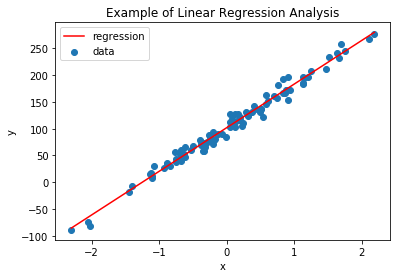

In [18]:
import matplotlib.pylab as plt
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

## Scikit-Learn 패키를 사용한 선형회귀분석t
- linear_model(subpackage) LinearRegresiion(class)
- 1. LinearRegression 클래스 객체 생성
    - `model = LinearRegression(fit_intercept = True)`
    - fit_intercept는 모형에 상수항이 있는가 없는가를 결정한다.
- 2. fit 메소드로 모형 추정. augmentation is automated. you dont have to do.
    - `model = model.fit(X,y)`
    - coef_ : 추정된 가중치 벡터
    - intercept_ : 추정된 상수항
- 3. predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    - `y_new = model.predict(x_new)`

In [21]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data,boston.target)

In [22]:
model_boston.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [23]:
model_boston.intercept_

36.4911032803614

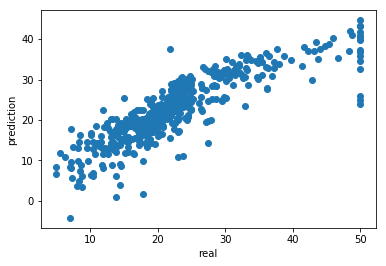

In [25]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel('real')
plt.ylabel(u"prediction")
plt.show()

## StatsModels 를 사용한 선형회귀분석
- statsmodel 패키지에서는 OLS 클래스를 사용하여 선형회귀분석을 실시한다.
- 1. OLS 클래스 객체를 생성한다. scikit-learn과는 달리 데이터를 미리 주어야 하고, 오그멘데이션을 add-constant로 직접해주어야 한다. 또한 입력 입수가 y가 먼저이다.
    - `model = OLS(y,X)`
- 2. fit 메서드로 모형 추정 scikit-learn 에서는 fit이 자기 자신을 반환하는 형태이지만 sm에서는 별도의 RegressionResults 클래스 객체로 출력된다.
    - `result = model.fit()`
- 3. RegressionResults 클래스 객체는 결과 리포트용 summary method와 예측을 위한  prediction method를 제공한다.

In [30]:
import pandas as pd
dfX0 = pd.DataFrame(boston.data,columns=boston.feature_names)
dfX= sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target,columns=['MEDV'])
model_boston2 = sm.OLS(dfy,dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          6.95e-135
Time:                        01:09:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

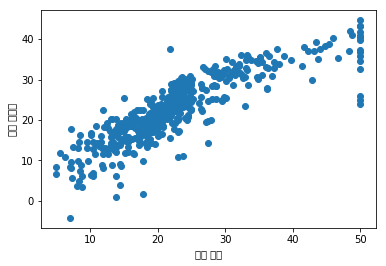

In [31]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.show()

In [34]:
dfy_new.mean()

22.53280632411066

예측을 할 때에는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. prediction 명령의 인수로는 회귀 분석에 사용했던 원래 X 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 `resid` `params` 가 있다.

In [35]:
result_boston2.params


const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [36]:
result_boston2.resid.head()


0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

이외에도 StatsModels 패키지는 회귀분석 결과를 살펴볼 수 있는 다양한 메서드와 도구를 제공한다. `plot_regress_exog` 명령은 StatsModels 패키지가 제공하는 분석용 함수의 한 예이다.

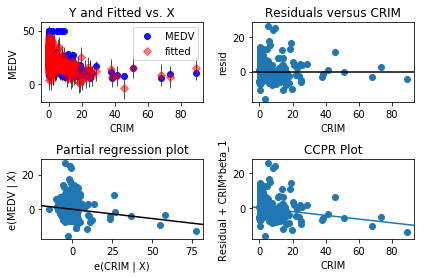

In [37]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()